Tento notebook bude sluzit pre klasifikaciu nad testovacimi datami. Ktore nasledne ulozime do subor s pridanym stlpcom 'class'.

In [11]:
import scipy.stats as stats
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute._iterative import IterativeImputer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser as parser
from sklearn.impute import SimpleImputer as Imputer, SimpleImputer
from sklearn.neighbors import NearestNeighbors as neigh
from sklearn.neighbors import KNeighborsRegressor as neigh
from sklearn.model_selection import train_test_split as split, cross_val_score
from sklearn import metrics
from math import sqrt
import json
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from missingpy import KNNImputer, MissForest
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import copy
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [12]:
merged_data = pd.read_csv('trained_datas.csv',index_col=0)
# merged_data.info()
merged_data = merged_data.drop(['name', 'address', 'date_of_birth'], axis = 1)
categoric = merged_data.select_dtypes(include = ['object'])

encoder = ce.OneHotEncoder()
encoder.fit(categoric)
transformed = encoder.transform(categoric)

merged_data = merged_data.drop(categoric, axis = 1)
merged_data = merged_data.merge(transformed, left_index=True, right_index=True)
merged_data

,education-num,capital-gain,fnlwgt,hours-per-week,capital-loss,kurtosis_glucose,kurtosis_oxygen,mean_glucose,mean_oxygen,skewness_glucose,...,native-country_37,native-country_38,native-country_39,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7
0,1.595991,-0.307122,1.389200,2.451874,-0.227166,1.280503,3.513019,95.351562,14.103679,3.351277,...,0,0,0,1,0,0,0,0,0,0
1,-0.060364,-0.307122,0.215816,1.190634,-0.227166,0.267679,8.402489,111.164062,2.902174,-0.141940,...,0,0,0,0,1,0,0,0,0,0
2,-0.060364,-0.307122,0.276511,0.774582,-0.227166,5.600391,1.042517,14.460938,57.382107,34.223119,...,0,0,0,0,1,0,0,0,0,0
3,-0.060364,-0.307122,-0.437769,-2.727391,-0.227166,0.510415,10.508914,107.796875,1.910535,1.672603,...,0,0,0,0,1,0,0,0,0,0
4,-0.060364,-0.307122,0.055623,2.451874,-0.227166,0.459786,12.595281,111.484375,1.599498,-0.116594,...,0,0,0,0,1,0,0,0,0,0
5,-0.447286,-0.307122,-1.124758,-0.049753,-0.227166,0.981032,5.359597,91.835938,6.798495,2.209713,...,0,0,0,0,1,0,0,0,0,0
6,-0.447286,-0.307122,0.389312,-0.049753,-0.227166,0.167162,8.173738,112.007812,2.843645,-0.447539,...,0,0,0,0,1,0,0,0,0,0
7,-0.447286,-0.307122,-0.858760,-0.049753,-0.227166,2.102055,5.255796,65.539062,6.836120,9.023275,...,0,0,0,0,1,0,0,0,0,0
8,-0.447286,-0.307122,0.734507,-0.861695,-0.227166,5.325043,0.969790,22.312500,66.960702,30.008196,...,0,0,0,0,1,0,0,0,0,0
9,-0.447286,-0.307122,1.178920,-0.049753,-0.227166,0.269218,16.834602,110.406250,1.040134,0.210545,...,0,0,0,0,1,0,0,0,0,0


In [13]:
cls = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7, \
                       max_features=None, max_leaf_nodes=25, \
                       min_impurity_decrease=0.0, min_impurity_split=None, \
                       min_samples_leaf=4, min_samples_split=2, \
                       min_weight_fraction_leaf=0.0, presort=False, \
                       random_state=0, splitter='random')



X = merged_data[merged_data.columns.difference(['class'])]
y = merged_data['class']

scores = cross_val_score(cls, X, y, cv=10, scoring = 'f1_macro')
print(scores.mean())

cls = cls.fit(X, y)

0.9456129659944754


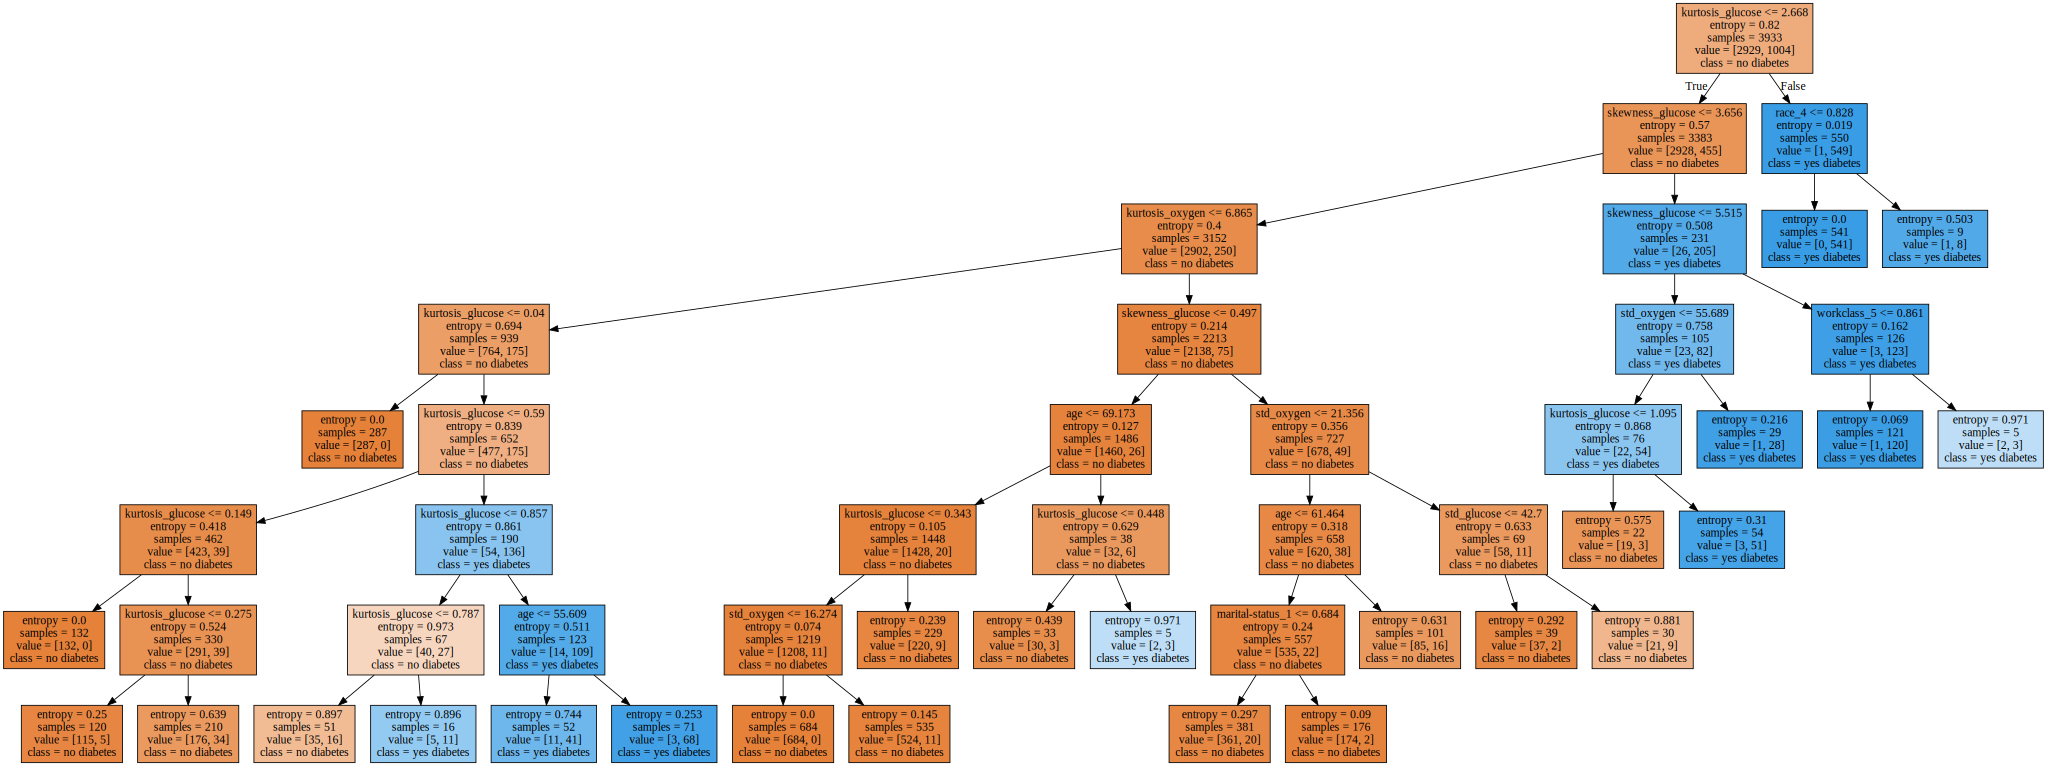

In [14]:
graph = Source(export_graphviz(cls, 
                               out_file=None,
                               feature_names=X.columns,
                               class_names=['no diabetes', 'yes diabetes'],\
                               filled = True))

display(SVG(graph.pipe(format='svg')))

from IPython.display import HTML # toto je tu len pre to aby sa mi obrazok zmestil na obrazovku
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [15]:
test_merged_data = pd.read_csv('test_datas.csv',index_col=0)
# val_merged_data.info()
test_merged_data = test_merged_data.drop(['name', 'address', 'date_of_birth'], axis = 1)
categoric = test_merged_data.select_dtypes(include = ['object'])
transformed = encoder.transform(categoric)

test_merged_data = test_merged_data.drop(categoric, axis = 1)
test_merged_data = test_merged_data.merge(transformed, left_index=True, right_index=True)

In [16]:
test_merged_data['class'] = cls.predict(test_merged_data[test_merged_data.columns.difference(['class'])])

In [17]:
test_merged_data.to_csv('final_classification.csv')
test_merged_data['class'].value_counts()

0.0    1051
1.0     261
Name: class, dtype: int64

Celkovy dataset finalnej klasifikacie sme ulozili do suboru 'final_classification.csv'. Tento subor obsahuje 1051 pacientov bez choroby a 261 pacientov s chorobou.

Na klasifikaciu sme pouzili DecisionTree s nastavenim hyperparametrov, pricom tieto parametre sme nastavili podla vysledkov optimalizacie hyperparametrov (obstali ako najlepsie).

Tymito hyperparametrami su:
* class_weight=None
* criterion='entropy'
* max_depth=7
* max_features=None 
* max_leaf_nodes=25
* min_impurity_decrease=0.0 
* min_impurity_split=None
* min_samples_leaf=4 
* min_samples_split=2 
* min_weight_fraction_leaf=0.0 
* presort=False 
* random_state=0
* splitter='random'